In [34]:
import pandas as pd
data = pd.read_csv('ev_data.csv')
data_2 = pd.read_csv('processed_ev_data.csv')

In [35]:
data_1 = data[:13152]

In [36]:
data_1.info()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13152 entries, 0 to 13151
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle ID              13152 non-null  object 
 1   Charger ID              13152 non-null  object 
 2   Date                    13152 non-null  object 
 3   Charging Time           13152 non-null  float64
 4   Average Power           13152 non-null  float64
 5   Max Power               13108 non-null  float64
 6   Total Energy Delivered  13152 non-null  float64
 7   SOC Charged             13152 non-null  float64
dtypes: float64(5), object(3)
memory usage: 822.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13909 entries, 0 to 13908
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle ID              13909 non-null  object 
 1   Charger ID              13909 non-nu

In [37]:
data_process = data_2.dropna()


In [38]:
input_raw = data_1[['Charging Time', 'Average Power', 'SOC Charged']]
input_process = data_process[['Charging Time', 'Average Power', 'SOC Charged']]


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_raw = scaler.fit_transform(input_raw)
y_raw = data_1['Total Energy Delivered']
X_process = scaler.fit_transform(input_process)
y_process = data_process['Total Energy Delivered']
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
X_train_process, X_test_process, y_train_process, y_test_process = train_test_split(X_process, y_process, test_size=0.2, random_state=42)


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [41]:
linear_model = LinearRegression()
linear_model.fit(X_train_raw, y_train_raw)

# Predict on test set
y_pred = linear_model.predict(X_test_raw)

# Evaluate the model
mse = mean_squared_error(y_test_raw, y_pred)
r2 = r2_score(y_test_raw, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 81.45674702638745
R-squared (R2 Score): 0.6234983133526065


In [42]:
linear_model = LinearRegression()
linear_model.fit(X_train_process, y_train_process)

y_pred = linear_model.predict(X_test_process)

mse = mean_squared_error(y_test_process, y_pred)
r2 = r2_score(y_test_process, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 78.0129935326163
R-squared (R2 Score): 0.5974196066846079


In [43]:
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_raw, y_train_raw)

y_pred_ridge = ridge_model.predict(X_test_raw)

mse_ridge = mean_squared_error(y_test_raw, y_pred_ridge)
r2_ridge = r2_score(y_test_raw, y_pred_ridge)


print("Ridge Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R-squared (R2 Score): {r2_ridge}")


Ridge Regression Model Evaluation:
Mean Squared Error (MSE): 81.45753373949573
R-squared (R2 Score): 0.6234946770815426


In [44]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_process, y_train_process)

y_pred_ridge = ridge_model.predict(X_test_process)

mse_ridge = mean_squared_error(y_test_process, y_pred_ridge)
r2_ridge = r2_score(y_test_process, y_pred_ridge)


print("Ridge Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R-squared (R2 Score): {r2_ridge}")

Ridge Regression Model Evaluation:
Mean Squared Error (MSE): 78.01295013923875
R-squared (R2 Score): 0.5974198306129845


In [45]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_raw, y_train_raw)
y_pred_lasso = lasso_model.predict(X_test_raw)

mse_lasso = mean_squared_error(y_test_raw, y_pred_lasso)
r2_lasso = r2_score(y_test_raw, y_pred_lasso)

print("Lasso Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R2 Score): {r2_lasso}")

Lasso Regression Model Evaluation:
Mean Squared Error (MSE): 81.59638837820505
R-squared (R2 Score): 0.6228528762782777


In [46]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_process, y_train_process)
y_pred_lasso = lasso_model.predict(X_test_process)

mse_lasso = mean_squared_error(y_test_process, y_pred_lasso)
r2_lasso = r2_score(y_test_process, y_pred_lasso)

print("Lasso Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R2 Score): {r2_lasso}")

Lasso Regression Model Evaluation:
Mean Squared Error (MSE): 78.11055465523197
R-squared (R2 Score): 0.5969161495893679


In [47]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_raw, y_train_raw)

y_pred_svr = svr_model.predict(X_test_raw)

mse_svr = mean_squared_error(y_test_raw, y_pred_svr)
r2_svr = r2_score(y_test_raw, y_pred_svr)
print("Support Vector Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"R-squared (R2 Score): {r2_svr}")

Support Vector Regressor Model Evaluation:
Mean Squared Error (MSE): 58.5669259144439
R-squared (R2 Score): 0.7292974837136829


In [48]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_process, y_train_process)

y_pred_svr = svr_model.predict(X_test_process)

mse_svr = mean_squared_error(y_test_process, y_pred_svr)
r2_svr = r2_score(y_test_process, y_pred_svr)
print("Support Vector Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"R-squared (R2 Score): {r2_svr}")

Support Vector Regressor Model Evaluation:
Mean Squared Error (MSE): 51.30111913856195
R-squared (R2 Score): 0.7352642965599396


In [49]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_raw, y_train_raw)

y_pred_rf = rf_model.predict(X_test_raw)

mse_rf = mean_squared_error(y_test_raw, y_pred_rf)
r2_rf = r2_score(y_test_raw, y_pred_rf)

print("Random Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2 Score): {r2_rf}")

Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 9.7756884524906
R-squared (R2 Score): 0.9548157356528139


In [50]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_process, y_train_process)

y_pred_rf = rf_model.predict(X_test_process)

mse_rf = mean_squared_error(y_test_process, y_pred_rf)
r2_rf = r2_score(y_test_process, y_pred_rf)

print("Random Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2 Score): {r2_rf}")

Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 10.649774045410608
R-squared (R2 Score): 0.9450426136752598


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_raw, y_train_raw)

y_pred_gb = gb_model.predict(X_test_raw)

mse_gb = mean_squared_error(y_test_raw, y_pred_gb)
r2_gb = r2_score(y_test_raw, y_pred_gb)

print("Gradient Boosting Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R-squared (R2 Score): {r2_gb}")

Gradient Boosting Regressor Model Evaluation:
Mean Squared Error (MSE): 14.166544104237635
R-squared (R2 Score): 0.9345207371529048


In [52]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_process, y_train_process)

y_pred_gb = gb_model.predict(X_test_process)

mse_gb = mean_squared_error(y_test_process, y_pred_gb)
r2_gb = r2_score(y_test_process, y_pred_gb)

print("Gradient Boosting Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R-squared (R2 Score): {r2_gb}")

Gradient Boosting Regressor Model Evaluation:
Mean Squared Error (MSE): 14.74018508910754
R-squared (R2 Score): 0.9239343442418524


C:\Users\DAT\AppData\Local\Temp\ipykernel_13576\411150816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_process[['Charging Time', 'Average Power', 'SOC Charged']] = scaler.fit_transform(


Epoch [100/1000], Loss: 354.9799
Epoch [200/1000], Loss: 171.2348
Epoch [300/1000], Loss: 62.3106
Epoch [400/1000], Loss: 32.9936
Epoch [500/1000], Loss: 28.2054
Epoch [600/1000], Loss: 25.8715
Epoch [700/1000], Loss: 26.3426
Epoch [800/1000], Loss: 25.0030
Epoch [900/1000], Loss: 24.2493
Epoch [1000/1000], Loss: 24.0227
Neural Network Model Evaluation:
Mean Squared Error (MSE): 16.783355712890625
R-squared (R2 Score): 0.9122217893600464


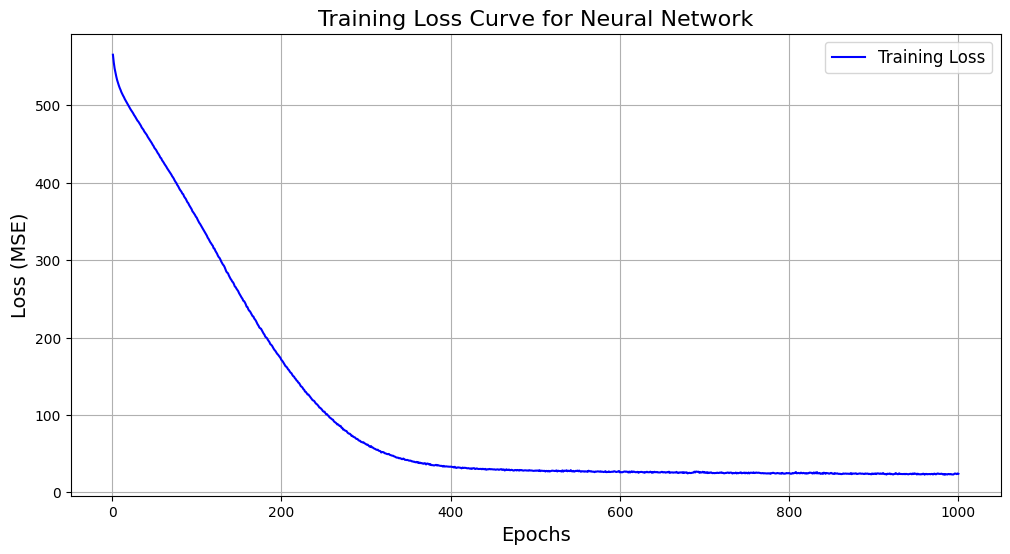

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

data_process[['Charging Time', 'Average Power', 'SOC Charged']] = scaler.fit_transform(
    data_process[['Charging Time', 'Average Power', 'SOC Charged']]
)

X_raw = data_process[['Charging Time', 'Average Power', 'SOC Charged']].values
y_raw = data_process['Total Energy Delivered'].values

X = torch.tensor(X_raw, dtype=torch.float32)
y = torch.tensor(y_raw, dtype=torch.float32).view(-1, 1)

train_size = int(0.8 * len(X))
test_size = len(X) - train_size
X_train, X_test = torch.utils.data.random_split(X, [train_size, test_size])
y_train, y_test = torch.utils.data.random_split(y, [train_size, test_size])

class EnergyDNN(nn.Module):
    def __init__(self, input_size):
        super(EnergyDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.3)
        
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.3)
        
        self.fc4 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        
        x = self.fc4(x)
        return x

input_size = X.shape[1]
model = EnergyDNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses = []

epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train.dataset)
    loss = criterion(y_pred, y_train.dataset)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
y_pred = model(X_test.dataset).detach().numpy()
mse = mean_squared_error(y_test.dataset, y_pred)
r2 = r2_score(y_test.dataset, y_pred)

print("Neural Network Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", color="blue")
plt.title("Training Loss Curve for Neural Network", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss (MSE)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



C:\Users\DAT\AppData\Local\Temp\ipykernel_13576\541472504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1[['Charging Time', 'Average Power', 'SOC Charged']] = scaler.fit_transform(


Epoch [100/1000], Loss: 391.5625
Epoch [200/1000], Loss: 188.9295
Epoch [300/1000], Loss: 69.8164
Epoch [400/1000], Loss: 38.5012
Epoch [500/1000], Loss: 33.8638
Epoch [600/1000], Loss: 32.9601
Epoch [700/1000], Loss: 31.0031
Epoch [800/1000], Loss: 29.3261
Epoch [900/1000], Loss: 29.1148
Epoch [1000/1000], Loss: 26.9706
Neural Network Model Evaluation:
Mean Squared Error (MSE): 19.973114013671875
R-squared (R2 Score): 0.9047915935516357


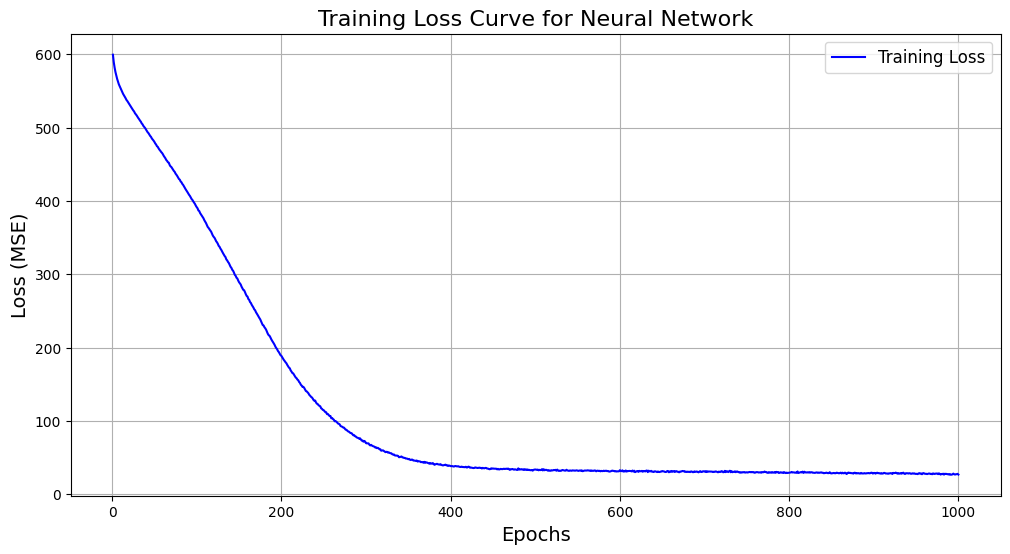

In [54]:
data_1[['Charging Time', 'Average Power', 'SOC Charged']] = scaler.fit_transform(
    data_1[['Charging Time', 'Average Power', 'SOC Charged']]
)

X_raw = data_1[['Charging Time', 'Average Power', 'SOC Charged']].values
y_raw = data_1['Total Energy Delivered'].values

X = torch.tensor(X_raw, dtype=torch.float32)
y = torch.tensor(y_raw, dtype=torch.float32).view(-1, 1)

train_size = int(0.8 * len(X))
test_size = len(X) - train_size
X_train, X_test = torch.utils.data.random_split(X, [train_size, test_size])
y_train, y_test = torch.utils.data.random_split(y, [train_size, test_size])

input_size = X.shape[1]
model_2 = EnergyDNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.001)
train_losses = []
epochs = 1000
for epoch in range(epochs):
    model_2.train()
    optimizer.zero_grad()
    y_pred = model_2(X_train.dataset)
    loss = criterion(y_pred, y_train.dataset)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

model_2.eval()
y_pred = model_2(X_test.dataset).detach().numpy()
mse = mean_squared_error(y_test.dataset, y_pred)
r2 = r2_score(y_test.dataset, y_pred)

print("Neural Network Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", color="blue")
plt.title("Training Loss Curve for Neural Network", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss (MSE)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

